# I am currently enrolled in Autonomous Vehicle Project under Dr. Sharma T, as discussed with mam we don't have to submit Assignment-1

In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tipsdataset/tips.csv


In [165]:
df = pd.read_csv("/kaggle/input/tipsdataset/tips.csv")

In [166]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [167]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [168]:
df_gender = pd.get_dummies(df["sex"])
df["sex"] = df_gender["Female"]

In [169]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,True,No,Sun,Dinner,2
1,10.34,1.66,False,No,Sun,Dinner,3
2,21.01,3.50,False,No,Sun,Dinner,3
3,23.68,3.31,False,No,Sun,Dinner,2
4,24.59,3.61,True,No,Sun,Dinner,4


In [170]:
df_smoker = pd.get_dummies(df["smoker"])
df["smoker"] = df_smoker["Yes"]

In [171]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,True,False,Sun,Dinner,2
1,10.34,1.66,False,False,Sun,Dinner,3
2,21.01,3.50,False,False,Sun,Dinner,3
3,23.68,3.31,False,False,Sun,Dinner,2
4,24.59,3.61,True,False,Sun,Dinner,4


In [172]:
from sklearn.preprocessing import LabelEncoder
le_day = LabelEncoder()
le_time = LabelEncoder()
day_label = pd.DataFrame(le_day.fit_transform(df["day"]),  columns=['day'])
time_label = pd.DataFrame(le_time.fit_transform(df["time"]), columns=['time'])

In [173]:
le_day.classes_

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [174]:
le_time.classes_

array(['Dinner', 'Lunch'], dtype=object)

In [175]:
df["day"] = day_label["day"]
df['time'] = time_label["time"]

In [176]:
df.tail(30)

,total_bill,tip,sex,smoker,day,time,size
214,28.17,6.50,True,True,1,0,3
215,12.90,1.10,True,True,1,0,2
216,28.15,3.00,False,True,1,0,5
217,11.59,1.50,False,True,1,0,2
218,7.74,1.44,False,True,1,0,2
219,30.14,3.09,True,True,1,0,4
220,12.16,2.20,False,True,0,1,2
221,13.42,3.48,True,True,0,1,2
222,8.58,1.92,False,True,0,1,1
223,15.98,3.00,True,False,0,1,3


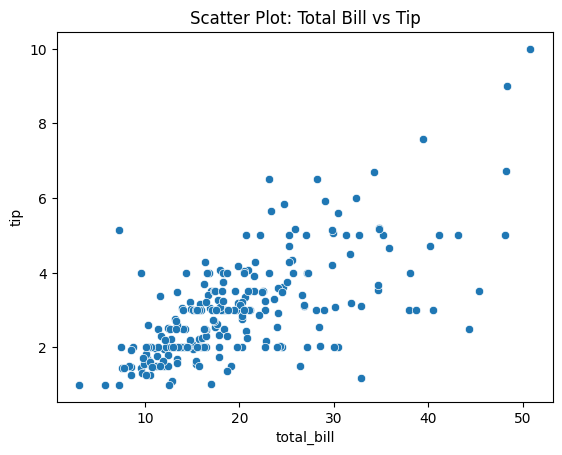

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Scatter Plot
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, bin

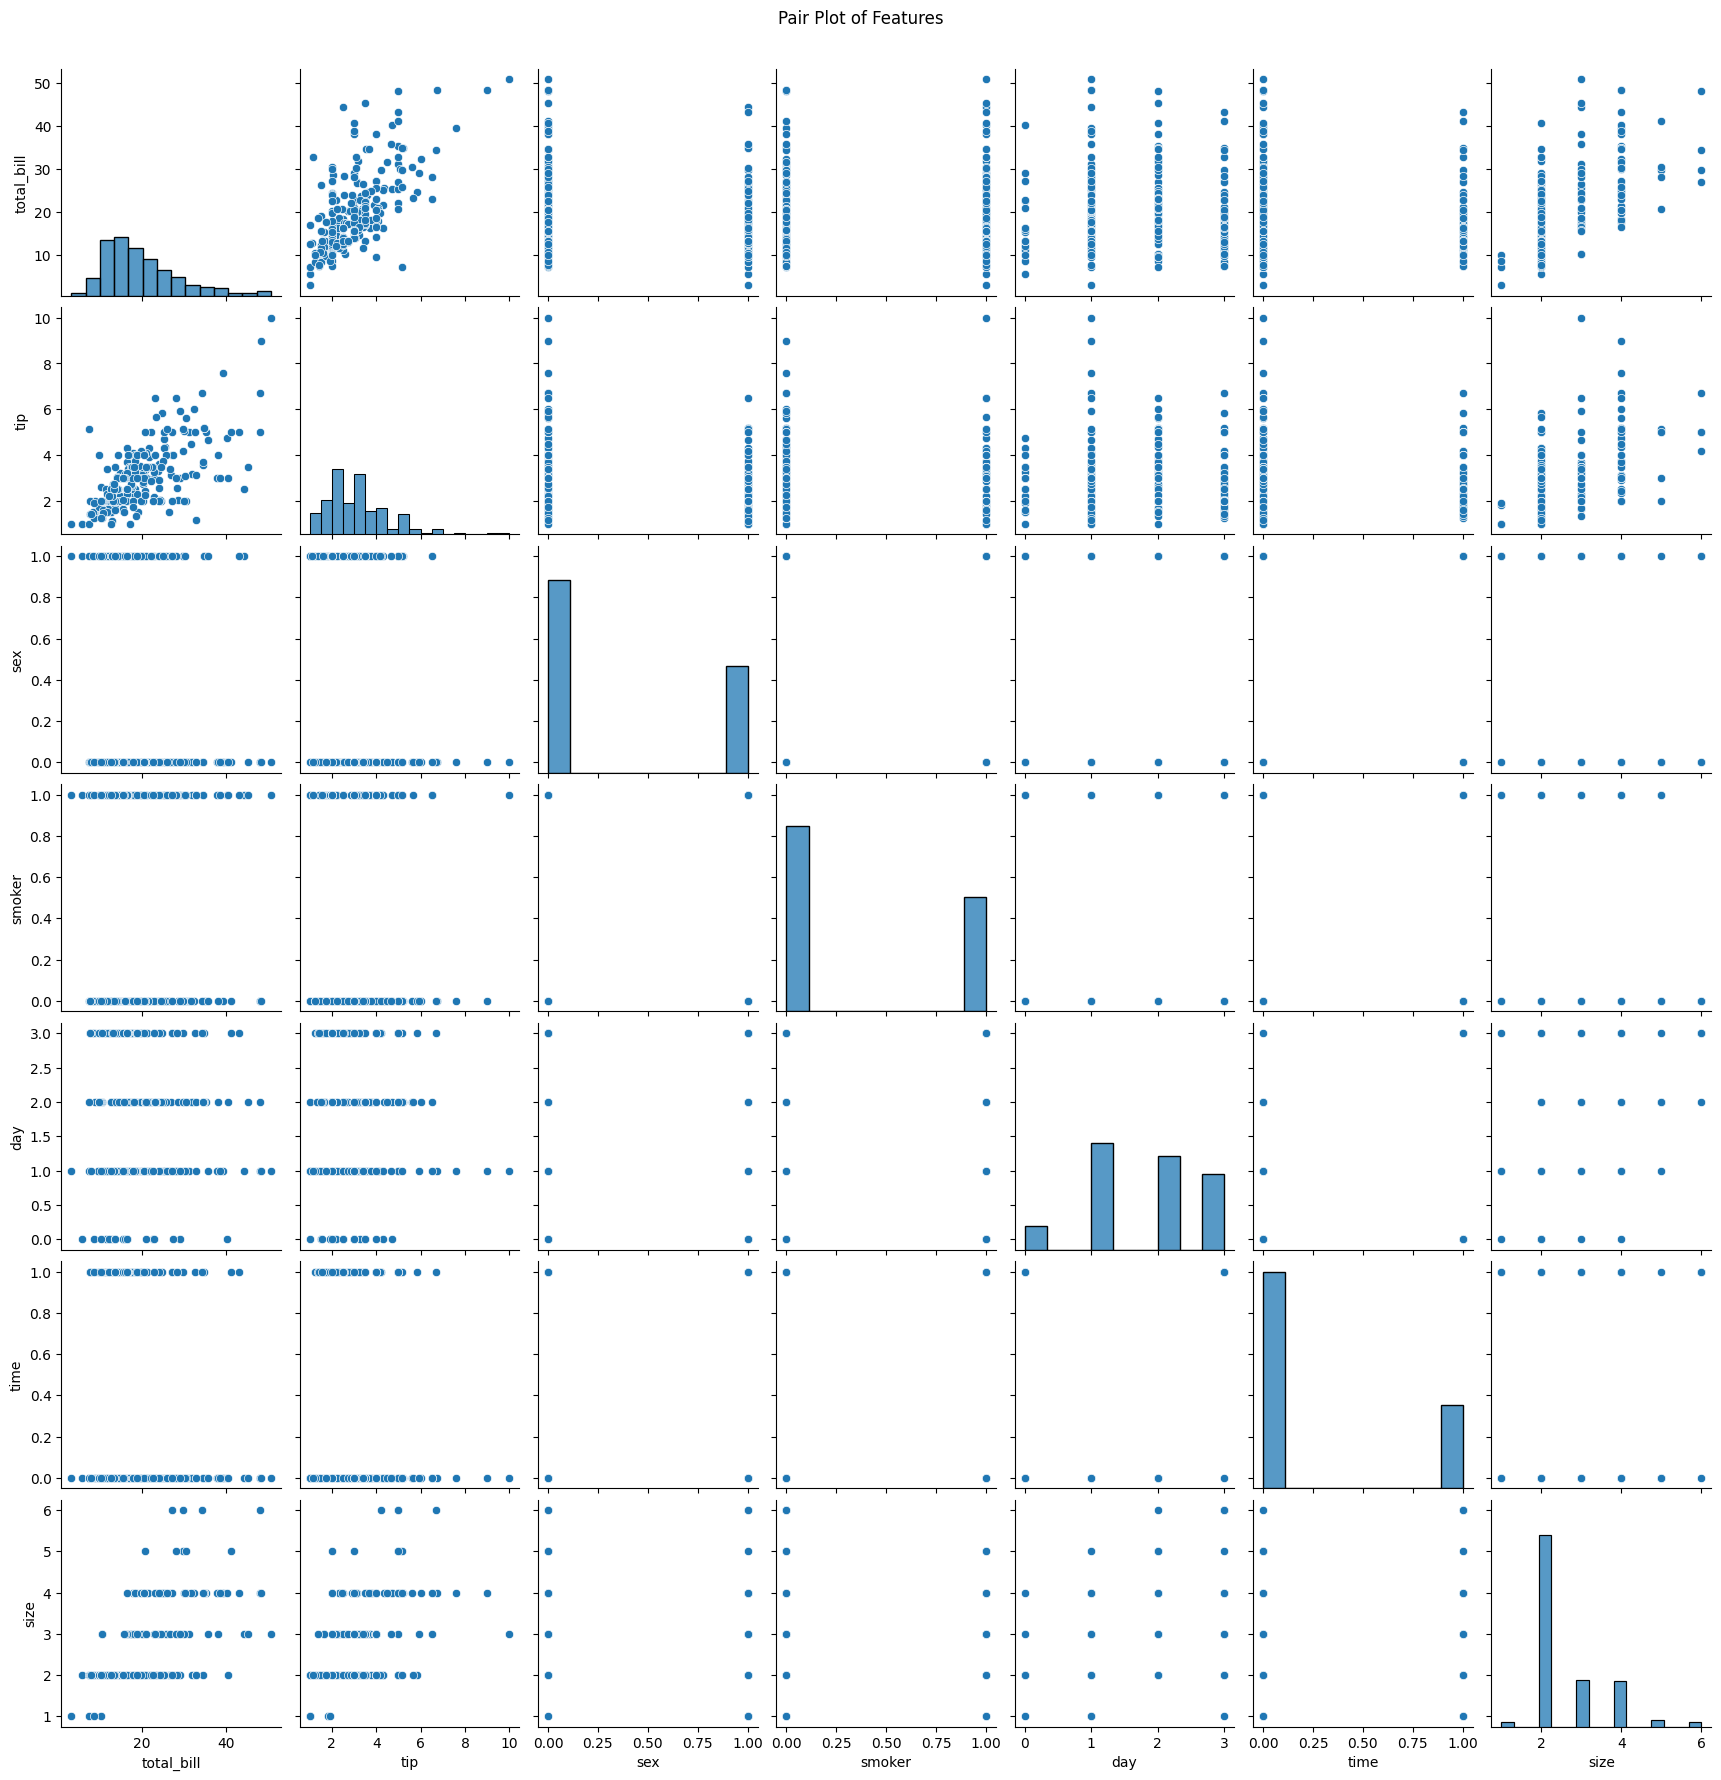

In [178]:
# Pair Plot for Multiple Features
sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

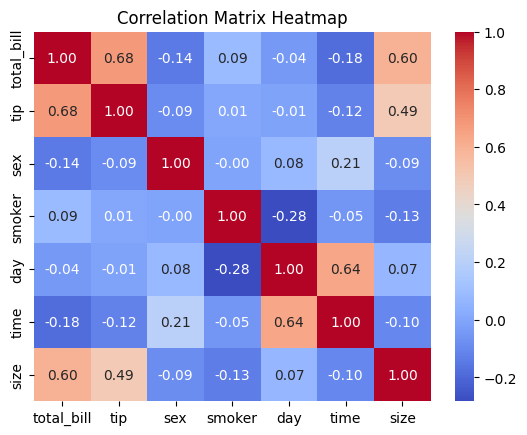

In [179]:
# Correlation Matrix (Heatmap)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [180]:
# Statistical Test for Linearity (Rainbow Test)
X = sm.add_constant(df['total_bill'])
y = df['tip']
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.1291192152551375


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


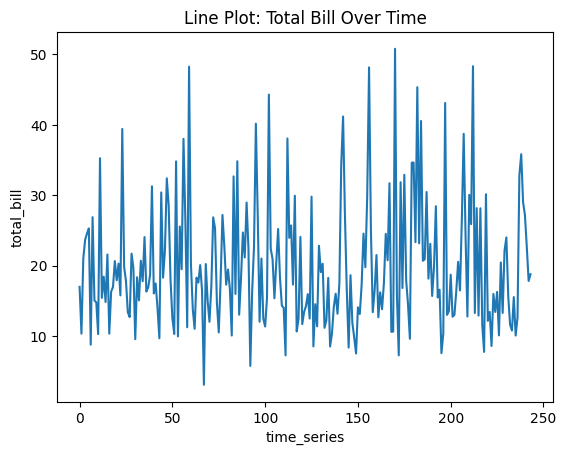

In [181]:
# Line Plot (for time-series da
df['time_series'] = np.arange(len(df))
sns.lineplot(data=df, x='time_series', y='total_bill')
plt.title('Line Plot: Total Bill Over Time')
plt.show()

* Imports

In [182]:
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [183]:
# Columns to scale
columns_to_scale = ['total_bill', 'tip']

# Initialize the scaler
scaler = StandardScaler()

# Scale the specific columns
scaled_values = scaler.fit_transform(df[columns_to_scale])

# Convert scaled values to a DataFrame and update original data
df[columns_to_scale] = pd.DataFrame(scaled_values, columns=columns_to_scale, index=df.index)


In [ ]:
df.head()

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluation
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"MSE: {linear_mse:.4f}, R^2: {linear_r2:.4f}")


Linear Regression Results:
MSE: 0.5688, R^2: 0.5449


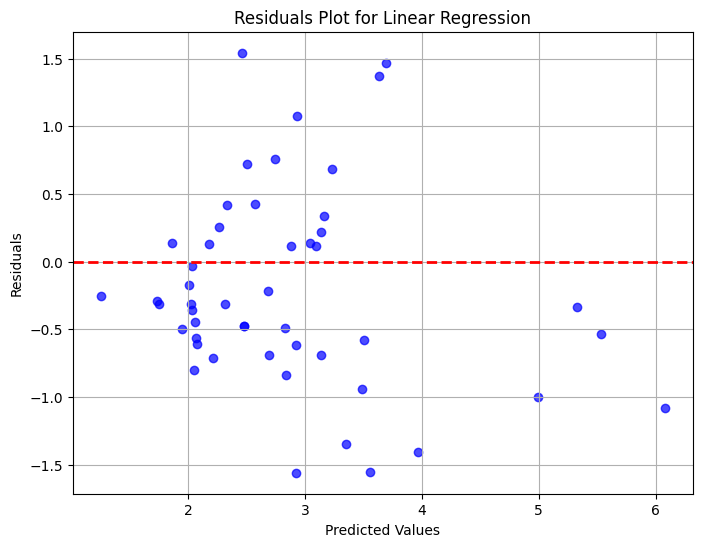

In [186]:
residuals = y_test - y_pred

# Residuals Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

* The above MSE and R^2 will be our baseline performances

# Ridge

In [187]:
# Ridge Regression
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

ridge_best_model = ridge_grid.best_estimator_
y_pred = ridge_best_model.predict(X_test)

# Evaluation
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print(f"Best Parameters: {ridge_grid.best_params_}")
print(f"MSE: {ridge_mse:.4f}, R^2: {ridge_r2:.4f}")

Ridge Regression Results:
Best Parameters: {'alpha': 10.0}
MSE: 0.5687, R^2: 0.5450


# Lasso

In [188]:
# Lasso Regression
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

lasso_best_model = lasso_grid.best_estimator_
y_pred = lasso_best_model.predict(X_test)

# Evaluation
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results:")
print(f"Best Parameters: {lasso_grid.best_params_}")
print(f"MSE: {lasso_mse:.4f}, R^2: {lasso_r2:.4f}")

Lasso Regression Results:
Best Parameters: {'alpha': 0.01}
MSE: 0.5686, R^2: 0.5451


# Decision Tree

In [189]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_param_grid = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}

tree_grid = GridSearchCV(tree_model, tree_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
tree_grid.fit(X_train, y_train)

tree_best_model = tree_grid.best_estimator_
y_pred = tree_best_model.predict(X_test)

# Evaluation
tree_mse = mean_squared_error(y_test, y_pred)
tree_r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression Results:")
print(f"Best Parameters: {tree_grid.best_params_}")
print(f"MSE: {tree_mse:.4f}, R^2: {tree_r2:.4f}")

Decision Tree Regression Results:
Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
MSE: 0.8901, R^2: 0.2879


# Random Forest

In [190]:
# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]}

forest_grid = GridSearchCV(forest_model, forest_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
forest_grid.fit(X_train, y_train)

forest_best_model = forest_grid.best_estimator_
y_pred = forest_best_model.predict(X_test)

# Evaluation
forest_mse = mean_squared_error(y_test, y_pred)
forest_r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print(f"Best Parameters: {forest_grid.best_params_}")
print(f"MSE: {forest_mse:.4f}, R^2: {forest_r2:.4f}")

Random Forest Regression Results:
Best Parameters: {'max_depth': 5, 'n_estimators': 100}
MSE: 0.8828, R^2: 0.2937


# SVR

In [191]:
# Support Vector Regression (SVR)
svr_model = SVR()
svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.5, 1.0], 'kernel': ['linear', 'rbf']}

svr_grid = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)

svr_best_model = svr_grid.best_estimator_
y_pred = svr_best_model.predict(X_test)

# Evaluation
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print("Support Vector Regression Results:")
print(f"Best Parameters: {svr_grid.best_params_}")
print(f"MSE: {svr_mse:.4f}, R^2: {svr_r2:.4f}")

Support Vector Regression Results:
Best Parameters: {'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}
MSE: 0.5725, R^2: 0.5420


# KNN

In [192]:
# K-Nearest Neighbors Regression (KNN)
knn_model = KNeighborsRegressor()
knn_param_grid = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn_best_model = knn_grid.best_estimator_
y_pred = knn_best_model.predict(X_test)

# Evaluation
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

print("KNN Regression Results:")
print(f"Best Parameters: {knn_grid.best_params_}")
print(f"MSE: {knn_mse:.4f}, R^2: {knn_r2:.4f}")

KNN Regression Results:
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
MSE: 0.9399, R^2: 0.2480


### **Key Points:**

#### **1. What Affects Tips?**
- Bigger bills = bigger tips (most significant factor).
- Larger groups tip more.
- Dinner times and weekends see higher tips.
- Smoking preference and server gender can influence tips but depend on context.

#### **2. How Accurate Are Predictions?**
- Linear regression gave the best results:
  - Highly accurate with consistent predictions.
  - Outperformed other models in tests.

#### **3. What Can Management Do?**
- Attract larger groups with special offers.
- Schedule experienced staff for dinners and weekends.
- Train servers to upsell items like drinks or desserts.
- Use the model to plan staffing and manage resources better.

### **Actionable Insights**

1. **Upselling**: Train staff to suggest extras like drinks or desserts to increase bills and tips.  
2. **Peak Hours**: Schedule top staff during dinner and weekends for better service and higher tips.  
3. **Group Offers**: Attract larger groups with discounts or special deals.  
4. **Loyalty Programs**: Reward repeat customers to encourage more spending.  
5. **Plan Ahead**: Use data to forecast tips and adjust staffing and inventory.  
6. **Targeted Marketing**: Promote group deals and dinner specials to boost revenue.